In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("H:/TOPMENTOR/2024/April-month/April 7 Assignments/Assignment/Project - 3&4_Multiple_Reg/50_Startups.csv")

In [3]:
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Preprocessing of data

In [5]:
print("The number of rows and columns - ", data.shape)
print("The data types - ", data.dtypes)
print("The Number of Missing Records - ",data.isnull().sum())

The number of rows and columns -  (50, 5)
The data types -  R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object
The Number of Missing Records -  R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [6]:
##Exploratory Data Analysis 

In [7]:
print(data.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


In [8]:
print(data.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


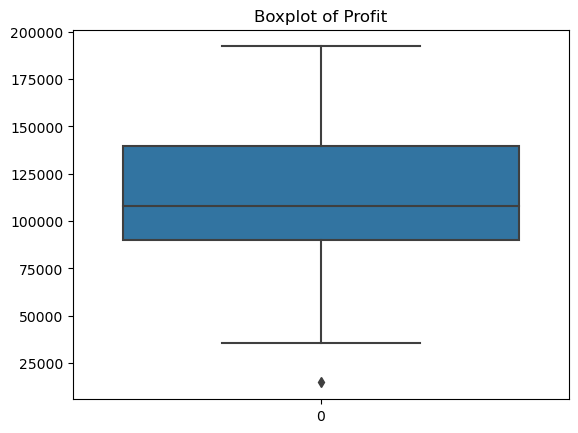

In [15]:
sns.boxplot(data['Profit'])
plt.title('Boxplot of Profit')
plt.savefig("Profit-boxplot.jpg", dpi=300)

## outliers dtetected in Profit variable so need to remove them

In [23]:
from scipy import stats              # zscore method to remove outliers
import numpy as np
z = np.abs(stats.zscore(data['Profit']))     
print(z)

0     2.011203
1     1.999430
2     1.980842
3     1.776627
4     1.357740
5     1.127250
6     1.105481
7     1.096210
8     1.007470
9     0.946022
10    0.854847
11    0.808168
12    0.741155
13    0.558750
14    0.516026
15    0.448720
16    0.375436
17    0.334771
18    0.307116
19    0.269773
20    0.161935
21    0.017534
22    0.041613
23    0.082169
24    0.086729
25    0.115493
26    0.157367
27    0.175542
28    0.218798
29    0.275882
30    0.302625
31    0.364127
32    0.365524
33    0.381787
34    0.383444
35    0.389291
36    0.533932
37    0.552955
38    0.771497
39    0.777094
40    0.846411
41    0.857466
42    1.015365
43    1.058960
44    1.173209
45    1.180082
46    1.566922
47    1.740627
48    1.913212
49    2.439313
Name: Profit, dtype: float64


In [24]:
threshold_z = 2  # zscore method to remove outliers

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = data.drop(outlier_indices)
print("Original DataFrame Shape:", data.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (50, 5)
DataFrame Shape after Removing Outliers: (48, 5)


In [42]:
df = pd.DataFrame(no_outliers)
print(f"Original Data:\n{df}\n")
# Use pd.get_dummies() to one-hot encode the categorical columns
df_pandas_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")

Original Data:
    R&D Spend  Administration  Marketing Spend       State     Profit
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  1

In [43]:
# Use the .replace() method to map True/False to 1/0
df_pandas_encoded = df_pandas_encoded.replace({True: 1, False: 0})

# Print the updated DataFrame 'df_pandas_encoded' where Boolean values 
# are now represented as integers (1/0)
print(df_pandas_encoded)

    R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
1   162597.70       151377.59        443898.53  191792.06              0   
2   153441.51       101145.55        407934.54  191050.39              1   
3   144372.41       118671.85        383199.62  182901.99              0   
4   142107.34        91391.77        366168.42  166187.94              1   
5   131876.90        99814.71        362861.36  156991.12              0   
6   134615.46       147198.87        127716.82  156122.51              0   
7   130298.13       145530.06        323876.68  155752.60              1   
8   120542.52       148718.95        311613.29  152211.77              0   
9   123334.88       108679.17        304981.62  149759.96              0   
10  101913.08       110594.11        229160.95  146121.95              1   
11  100671.96        91790.61        249744.55  144259.40              0   
12   93863.75       127320.38        249839.44  141585.52              1   
13   91992.3

In [25]:
### Splitting the Data into Training and Testing

In [44]:
X = df_pandas_encoded[['R&D Spend','Administration','Marketing Spend','State_Florida','State_New York']]
y=df_pandas_encoded[['Profit']]
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train.shape, X_test.shape

((33, 5), (15, 5))

In [45]:
y_train.shape, y_test.shape

((33, 1), (15, 1))

In [34]:
## Modelling

In [46]:
model = LinearRegression()
#### Train the Model with Training Data ----
model_train = model.fit(X_train, y_train)
print("Model Training is Completed")

Model Training is Completed


In [47]:
print("Model coefficient =",model.coef_)
print("Model intercept =",model.intercept_)

Model coefficient = [[ 7.91096937e-01 -2.34998768e-02  1.58911489e-02 -1.27411442e+03
  -5.23327280e+03]]
Model intercept = [54142.78424777]


In [48]:
##### Validate the Model
pred = model.predict(X_test)

In [49]:
#rsquare values  - to check the strength of the Model - 0 to 1
### if it is closer to 1 , that means the Model is Strong , closer to 0 weak model
##### mean squared error / root mean squared error 

from sklearn.metrics import r2_score, mean_squared_error

In [50]:
round(r2_score(y_test,pred),3)

0.936

In [51]:
round(mean_squared_error(y_test,pred),2)

110496194.55